In [2]:
#Lets import nessesary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
#Lest read the dataset and check the info 
df1=pd.read_csv("CT Ananlysis.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EngineeringGroup      7074 non-null   object
 1   PlanResourceTypeName  7074 non-null   object
 2   Region                7074 non-null   object
 3   RegionGroup           7074 non-null   object
 4   RegionType            7074 non-null   object
 5   IsMainstream          7074 non-null   object
 6   NewRegionFlag         7074 non-null   bool  
 7   NewDCFlag             7074 non-null   bool  
 8   PlanIntentName        7074 non-null   object
 9   IsNPI                 7074 non-null   bool  
 10  NewTechFlag           7074 non-null   int64 
 11  DeploymentSeverity    7074 non-null   int64 
 12  NumberOfRacks         7074 non-null   int64 
 13  _CT_SIGNAL_TO_DOCK    7074 non-null   int64 
 14  _CT_SIGNAL_TO_LIVE    7074 non-null   int64 
dtypes: bool(3), int64(5), object(7)
memory

In [ ]:
#We are going to consider only those features which we know beforehand to predict CT of the proposed project at the very start
#From the previous exploration, we knew that, _CT_SIGNAL_TO_DOCK is unknown at the very start of the project so, we are going to drop this feature

In [4]:
#There are some catogorical features which are marked as int64 and bool which have to be converted to object datatype
obj_fearure=['NewTechFlag','DeploymentSeverity','NewRegionFlag','IsNPI','NewDCFlag']
df1[obj_fearure] = df1[obj_fearure].astype('object')

In [5]:
#Lets check the info again to confirm if the datatypes are correct now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EngineeringGroup      7074 non-null   object
 1   PlanResourceTypeName  7074 non-null   object
 2   Region                7074 non-null   object
 3   RegionGroup           7074 non-null   object
 4   RegionType            7074 non-null   object
 5   IsMainstream          7074 non-null   object
 6   NewRegionFlag         7074 non-null   object
 7   NewDCFlag             7074 non-null   object
 8   PlanIntentName        7074 non-null   object
 9   IsNPI                 7074 non-null   object
 10  NewTechFlag           7074 non-null   object
 11  DeploymentSeverity    7074 non-null   object
 12  NumberOfRacks         7074 non-null   int64 
 13  _CT_SIGNAL_TO_DOCK    7074 non-null   int64 
 14  _CT_SIGNAL_TO_LIVE    7074 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 

In [6]:
df1.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,O365 Exchange,ActiveDirectory,East Europe,Not Restricted,Hub,Not Mainstream,False,False,Growth,False,0,3,1,16,82
1,O365 Exchange,ActiveDirectory,Europe North 2,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,16,82
2,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,20,97
3,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,35,101
4,O365 Exchange,ActiveDirectory,North Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,4,1,46,101


In [7]:
df2=df1.copy()

In [8]:
#lets label encode the catogorical features 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
cat_features=['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup','RegionType', 'IsMainstream', 
              'NewRegionFlag', 'NewDCFlag', 'PlanIntentName', 'IsNPI']
      
df2[cat_features] = df1[cat_features].apply(le.fit_transform)

In [10]:
df2.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,8,3,22,0,1,1,0,0,2,0,0,3,1,16,82
1,8,3,28,0,0,1,0,0,2,0,0,3,1,16,82
2,8,3,69,0,0,1,0,0,2,0,0,3,1,20,97
3,8,3,69,0,0,1,0,0,2,0,0,3,1,35,101
4,8,3,40,0,0,1,0,0,2,0,0,4,1,46,101


In [11]:
#lets define our predictors and outcome (Target)
x=df2.drop(["_CT_SIGNAL_TO_LIVE","_CT_SIGNAL_TO_DOCK"],axis=1)
y=df2["_CT_SIGNAL_TO_LIVE"]

In [12]:
#Lest split our data into Training and testing sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100)

In [13]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [14]:
# Lets fit out data to the model
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
# Lets do predictions on out test data
pred=RFR.predict(x_test)

In [16]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [17]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [18]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 64.19200433897326
MAE: 45.13256421665504
r_square: 0.4968195008454094


In [19]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

In [20]:
for feature in zip (x.columns, importances):
    print (feature)

('EngineeringGroup', 0.24808991143743067)
('PlanResourceTypeName', 0.1616972625653552)
('Region', 0.19156992454906907)
('RegionGroup', 0.012678881501579583)
('RegionType', 0.036401104543991675)
('IsMainstream', 0.10141998764319715)
('NewRegionFlag', 0.007977446144671297)
('NewDCFlag', 0.011831890374453842)
('PlanIntentName', 0.04171138045923766)
('IsNPI', 0.010792944316812979)
('NewTechFlag', 0.015620820671909848)
('DeploymentSeverity', 0.04949178500371159)
('NumberOfRacks', 0.11071666078857922)


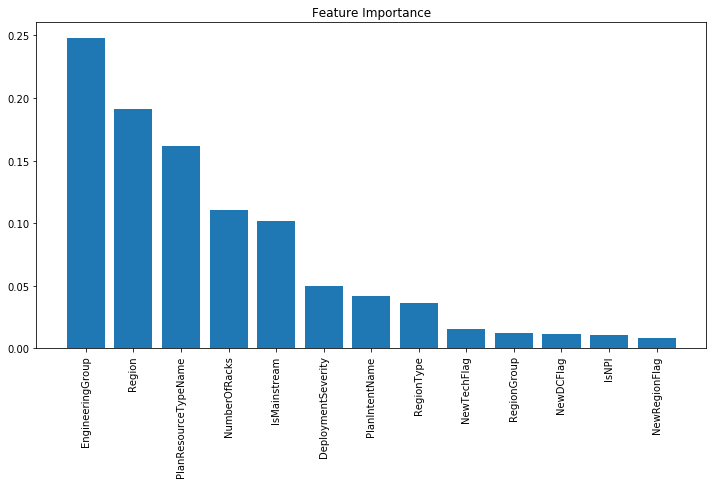

In [21]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
#Lets drop the least significant features-

In [22]:
x1=df2.drop(["NewDCFlag","NewRegionFlag","IsNPI","RegionGroup","_CT_SIGNAL_TO_LIVE","_CT_SIGNAL_TO_DOCK"],
            axis=1)
y1=df2["_CT_SIGNAL_TO_LIVE"]

In [23]:
#Lest split our data into Training and testing sets 
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,test_size=0.3,random_state=100)

In [24]:
RFR1=RandomForestRegressor()

In [25]:
RFR1.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
pred1=RFR1.predict(x1_test)

In [27]:
#Error calculation
RMSE1 = np.sqrt(mean_squared_error(y1_test, pred1))
MAE1 = mean_absolute_error(y1_test, pred1)
r_squre1= r2_score(y1_test, pred1)

In [28]:
print('RMSE :',RMSE1) 
print('MAE:', MAE1)
print("r_square:",r_squre1) #The results 

RMSE : 65.2301271089541
MAE: 46.01714426321823
r_square: 0.48041287803710275


In [29]:
#lets do Hyperparamter Tunning 

from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300],
    'criterion' : ['mse','friedman_mse','mae'],
    'max_depth' : [2,3,4,5,6,7,None]
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x1_train, y1_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed: 21.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [30]:
cv.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'n_estimators': 200}

In [36]:
rfr1=RandomForestRegressor(criterion="mse", max_depth=7,n_estimators=200)

In [37]:
rfr1.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
testpred=rfr1.predict(x1_test)

In [39]:
#Error calculation
RMSE1 = np.sqrt(mean_squared_error(y1_test, testpred))
MAE1 = mean_absolute_error(y1_test, testpred)
r_squre1= r2_score(y1_test, testpred)

In [40]:
print('RMSE :',RMSE1) 
print('MAE:', MAE1)
print("r_square:",r_squre1) #The results 

RMSE : 66.74786800535354
MAE: 48.81284935453848
r_square: 0.4559526167350627


In [ ]:
#Lets Try OneHot Encoding 

In [38]:
df3=df1.copy()

In [39]:
df4=pd.get_dummies(df3, drop_first=True)

In [40]:
df4.head()

,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE,EngineeringGroup_Azure AD (MSODS),EngineeringGroup_Azure Data Lake,EngineeringGroup_Azure Front Door,EngineeringGroup_Azure Key Vault,EngineeringGroup_CloudBuild,EngineeringGroup_FOPE,EngineeringGroup_NonWebComm,EngineeringGroup_O365 Exchange,EngineeringGroup_O365 SharePoint,EngineeringGroup_OneDrive,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Unassigned,EngineeringGroup_Xbox,PlanResourceTypeName_AKV,PlanResourceTypeName_ActiveDir-S,PlanResourceTypeName_ActiveDirectory,PlanResourceTypeName_BM CRAY CS MT,PlanResourceTypeName_BM CRAY CSIN,PlanResourceTypeName_BM CRAY CSIN MT,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU MT,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM CRAY IN CORE,PlanResourceTypeName_BM CRAY MT CORE,PlanResourceTypeName_BM CRAY MT OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM SAP LI1,PlanResourceTypeName_BM SAP MSEE,PlanResourceTypeName_BM SAP Network,PlanResourceTypeName_BM SAP Storage,PlanResourceTypeName_BM SAP VLI,PlanResourceTypeName_BM VMW CS COMP1,PlanResourceTypeName_BM VMW CS COMP2,PlanResourceTypeName_BM VMW CS MSEE,PlanResourceTypeName_BM VMWare Comp1,PlanResourceTypeName_BackEnd,PlanResourceTypeName_BackEnd-S,PlanResourceTypeName_Cafe,PlanResourceTypeName_CloudBuild,PlanResourceTypeName_Compute,PlanResourceTypeName_Compute HPC Gen 6.0,PlanResourceTypeName_Compute HPC-HB,PlanResourceTypeName_Compute-FAST,PlanResourceTypeName_Compute-SPO,PlanResourceTypeName_Confidential Compute,PlanResourceTypeName_Cosmos,PlanResourceTypeName_DNS,PlanResourceTypeName_Dedicated,PlanResourceTypeName_Dedicated Compute,PlanResourceTypeName_Discrete,PlanResourceTypeName_EOP-Capacity,PlanResourceTypeName_EOP-DI,PlanResourceTypeName_EOP-Global,PlanResourceTypeName_EOP-Sonar/ATP,PlanResourceTypeName_FPGA Compute,PlanResourceTypeName_FrontDoor,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_FrontEnd-S,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_G-ZRS Storage,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute 6.2,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Compute Gen 6.0,PlanResourceTypeName_GPU Machine Learning,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_Godzilla,PlanResourceTypeName_HPC,PlanResourceTypeName_HPC-HBv2,PlanResourceTypeName_Kona/ADL,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_MSODS,PlanResourceTypeName_MSODS - Compute,PlanResourceTypeName_Management,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_OneDrive,PlanResourceTypeName_PRD,PlanResourceTypeName_Passport - Compute,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Remote Viz Gen7,PlanResourceTypeName_Resource Forest,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_SQL Azure (DocDB),PlanResourceTypeName_SQL on Compute,PlanResourceTypeName_SQLDW Local Storage,PlanResourceTypeName_SWE,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_StorageFast,PlanResourceTypeName_Substrate,PlanResourceTypeName_Torus,PlanResourceTypeName_XArchive HDD,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,PlanResourceTypeName_ZRS Storage,PlanResourceTypeName_ZRS StorageFast,Region_APAC Southeast 2,Region_Australia Central,Region_Australia Central 2,Region_Australia East,Region_Australia Southeast,Region_Brazil East,Region_Brazil North,Region_Brazil Northeast,Region_Brazil South,Region_Brazil Southeast,Region_Canada Central,Region_Canada East,Region_Central India,Region_Central US,Region_Central US EUAP,Region_Chile Central,Region_China East,Region_China East 2,Region_China North,Region_China North 2,Region_East Asia,Region_East Euro

In [42]:
x2=df4.drop(["_CT_SIGNAL_TO_DOCK","_CT_SIGNAL_TO_LIVE"],axis=1)
y2=df4["_CT_SIGNAL_TO_LIVE"]

In [43]:
#Lest split our data into Training and testing sets 
x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y2,test_size=0.3,random_state=100)

In [44]:
RFR2=RandomForestRegressor()

In [45]:
RFR2.fit(x2_train,y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
pred2=RFR2.predict(x2_test)

In [47]:
#Error calculation
RMSE2 = np.sqrt(mean_squared_error(y2_test, pred2))
MAE2 = mean_absolute_error(y2_test, pred2)
r_squre2= r2_score(y2_test, pred2)

In [48]:
print('RMSE :',RMSE2) 
print('MAE:', MAE2)
print("r_square:",r_squre2) #The results 

RMSE : 65.38731904249536
MAE: 45.45357722784103
r_square: 0.47790565267070684


Lets Try GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=200)

In [58]:
gbr.fit(x1_train,y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
Gpred=gbr.predict(x1_test)

In [61]:
#Error calculation
RMSE1 = np.sqrt(mean_squared_error(y1_test, Gpred))
MAE1 = mean_absolute_error(y1_test, Gpred)
r_squre1= r2_score(y1_test, Gpred)

In [62]:
print('RMSE :',RMSE1) 
print('MAE:', MAE1)
print("r_square:",r_squre1) #The results

RMSE : 67.1742538525404
MAE: 49.63365112597962
r_square: 0.4489796590218821


In [63]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

GBR = GradientBoostingRegressor()
parameters = {
    'n_estimators': [100,200,300],
    'criterion' : ['mse','friedman_mse','mae'],
    'max_depth' : [2,3,4,5,6,7,8,None],
    "loss" : ['ls', 'lad', 'huber', 'quantile']
}

cv = GridSearchCV(GBR, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x1_train, y1_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 278.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 348.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [65]:
cv.best_params_

{'criterion': 'mse', 'loss': 'huber', 'max_depth': 6, 'n_estimators': 100}

In [66]:
gbr1=GradientBoostingRegressor(criterion= 'mse', loss= 'huber', max_depth= 6, n_estimators=100)

In [67]:
gbr1.fit(x1_train,y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
gpred=gbr1.predict(x1_test)

In [69]:
#Error calculation
RMSE2 = np.sqrt(mean_squared_error(y1_test, gpred))
MAE2 = mean_absolute_error(y1_test, gpred)
r_squre2= r2_score(y1_test, gpred)

In [70]:
print('RMSE :',RMSE2) 
print('MAE:', MAE2)
print("r_square:",r_squre2) #The results

RMSE : 64.01380025909344
MAE: 44.961147672905454
r_square: 0.4996093920016724
